# Wine dataset (nonflavanoid_phenols_Regression Task)

## imports

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint
from scipy.stats import zscore
from sklearn.decomposition import PCA


In [88]:
data = load_wine().data
target = load_wine().target

f_names = load_wine().feature_names
#f_targets = load_wine().target_names


In [89]:
df = pd.DataFrame(data, columns=f_names)

df['nonflavanoid_phenols'] = target

X = df.drop(['nonflavanoid_phenols'], axis=1)
y = df['nonflavanoid_phenols']


#Understanding the "nonflavanoid_phenols" Feature

***The nonflavanoid_phenols feature in the wine dataset: ***

represents the concentration of non-flavonoid phenolic compounds in the wine. These compounds, unlike flavonoids, do not contribute to the color but can influence the taste and astringency of the wine. In the context of regression analysis, this feature can be crucial for predicting the quality or type of wine, as variations in phenolic content can affect the wine's sensory properties. Proper handling and analysis of this feature can improve the accuracy of predictive models by providing insights into the wine's chemical profile and its impact on the overall quality.


## Understand Data
1. Describe Data

In [90]:
df.shape

(178, 13)

In [91]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0,1.82,4.32,1.04,2.93,735.0


In [92]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    int64  
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [94]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.938202,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.775035,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.000000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.000000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,1.000000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,2.000000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,2.000000,3.580000,13.000000,1.710000,4.000000,1680.000000


2. EDA - Descriptive

In [95]:
# chekc null
df.isna().sum().sum()

0

In [96]:
# check duplicate
df.duplicated().sum()

0

3. EDA - Viz

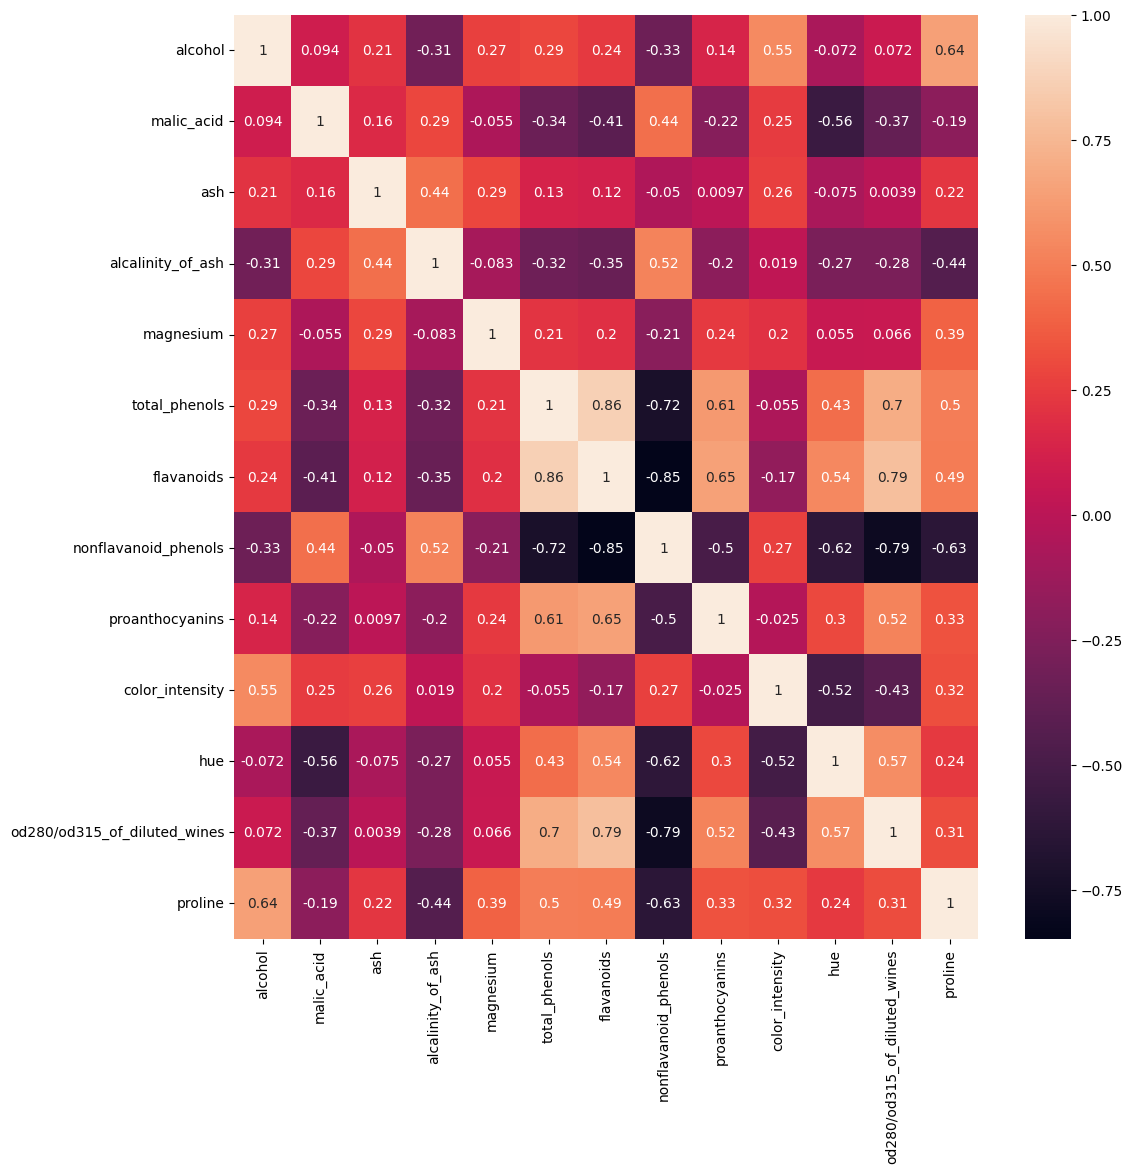

In [97]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()


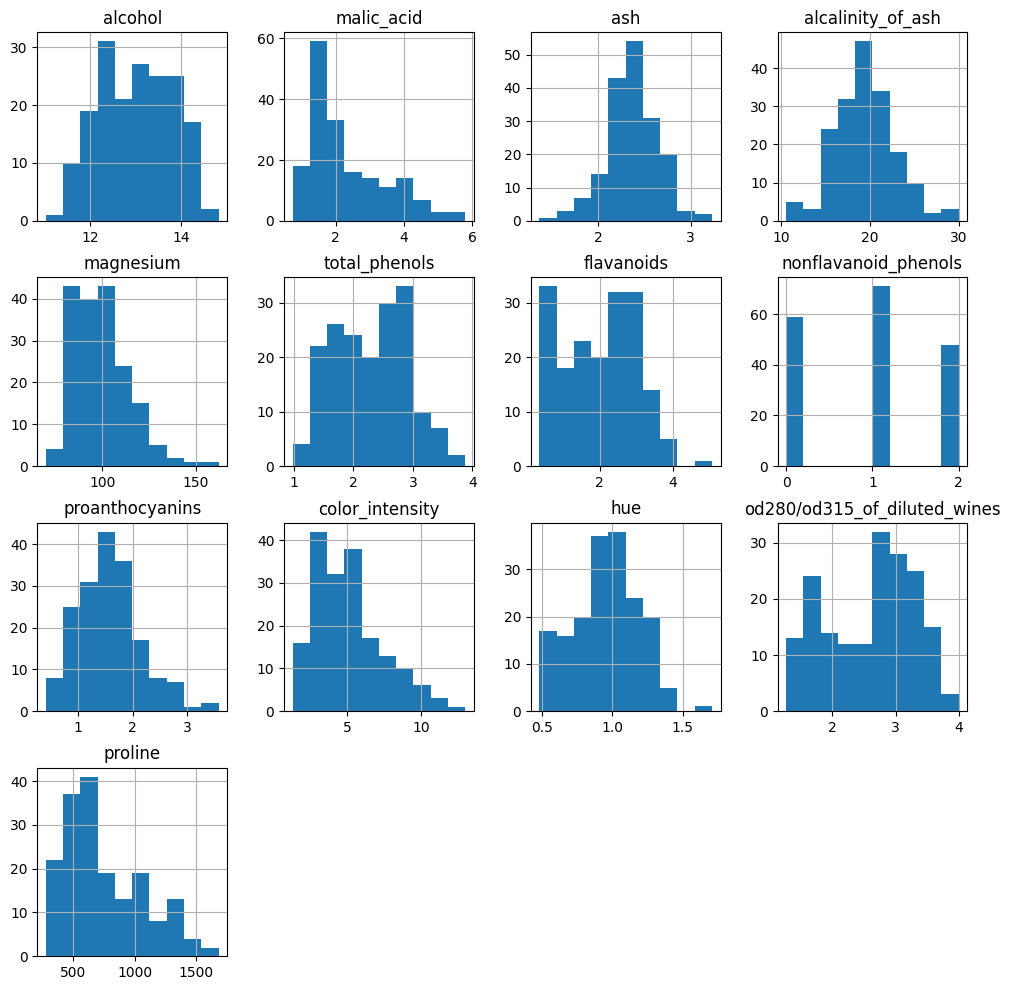

In [98]:
df.hist(figsize=(12,12))
plt.show()


## Preprocessing

##Z-Score Computation and Outlier Removal

In [99]:
#Compute Z-Score for each feature to identify and remove outliers
threshold = 3
z_scores = np.abs(zscore(X))
df_cleaned = df[(z_scores < threshold).all(axis=1)]


In [100]:
# categorical to numerical --> not valid for this dataset
# train_test split
X_cleaned = df_cleaned.drop(['nonflavanoid_phenols'], axis=1)
y_cleaned = df_cleaned['nonflavanoid_phenols']

X_train, X_test, y_train, y_test = train_test_split(X_cleaned,
                                                    y_cleaned,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)


In [101]:
# scale the features
mms = MinMaxScaler()
mms.fit(X_train) # learn min and max from train set for each column
X_train = mms.transform(X_train)
X_test = mms.transform(X_test) # ?


## Dimensionality Reduction(PCA)

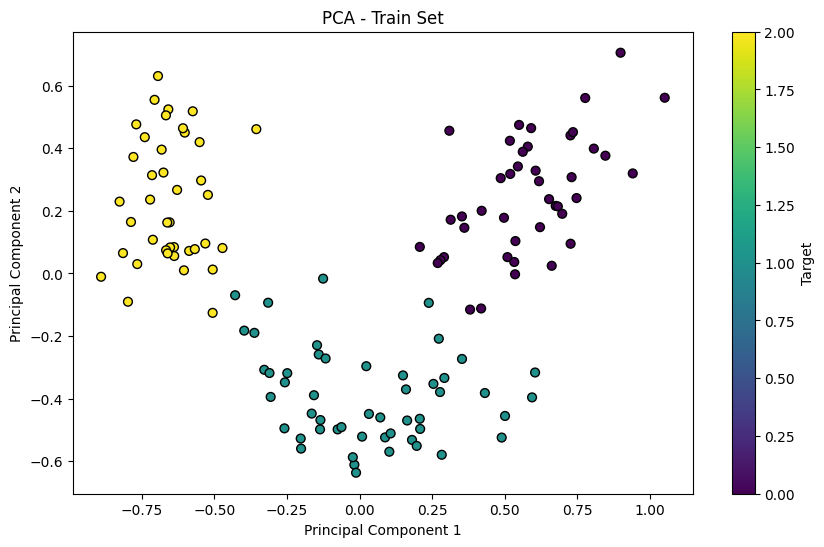

In [102]:
# PCA
pca = PCA(n_components=min(X_train.shape[1], 5))
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# PCA Data Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Train Set')
plt.colorbar(label='Target')
plt.show()


## train the model & prediction

In [103]:
# train the model & prediction
for i in range(2,20):
  knn_reg = KNeighborsRegressor(n_neighbors=i, metric="euclidean")
  knn_reg.fit(X_train_pca, y_train)
  y_pred = knn_reg.predict(X_test_pca)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  print(f'R2: {r2}')
  print(f'MSE: {mse}')
  print(f'MAE: {mae}')

R2: 0.9751461988304093
MSE: 0.014705882352941176
MAE: 0.029411764705882353
R2: 0.9613385315139701
MSE: 0.022875816993464054
MAE: 0.049019607843137254
R2: 0.9782529239766082
MSE: 0.012867647058823529
MAE: 0.03676470588235294
R2: 0.9622222222222222
MSE: 0.02235294117647059
MAE: 0.05294117647058823
R2: 0.9668615984405458
MSE: 0.019607843137254905
MAE: 0.04901960784313725
R2: 0.9685523332139874
MSE: 0.01860744297719088
MAE: 0.046218487394957986
R2: 0.9689327485380117
MSE: 0.01838235294117647
MAE: 0.04411764705882353
R2: 0.9736120135730272
MSE: 0.015613652868554831
MAE: 0.042483660130718956
R2: 0.9731578947368421
MSE: 0.015882352941176472
MAE: 0.041176470588235294
R2: 0.9761732154076652
MSE: 0.014098201263976663
MAE: 0.0427807486631016
R2: 0.9754913905133203
MSE: 0.0145016339869281
MAE: 0.041666666666666664
R2: 0.974705007093671
MSE: 0.014966933518969723
MAE: 0.04524886877828055
R2: 0.9703276047261009
MSE: 0.01755702280912365
MAE: 0.04831932773109243
R2: 0.9703963612735542
MSE: 0.0175163398